# Forecast educational attainment growth of regions in Finland

Data source: Statistic Finland

Table: 12bq -- Population aged 15 or over by level of education, municipality, gender and age, 1970-2022

Link: https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__vkour/statfin_vkour_pxt_12bq.px/

In [2]:
import pandas as pd
import numpy as np

## Processing raw data

In [12]:
# Create the base with region column DataFrame
base_df = pd.read_csv('../data/Indices/population_density_index.csv')
base_df = base_df[['Region code', 'Region name (en)', 'Region name (fi)']].copy()

base_df

Region code Region name (en) Region name (fi)
0         MK01          Uusimaa          Uusimaa
1         MK01          Uusimaa          Uusimaa
2         MK01          Uusimaa          Uusimaa
3         MK01          Uusimaa          Uusimaa
4         MK01          Uusimaa          Uusimaa
..         ...              ...              ...
90        MK21            Åland       Ahvenanmaa
91        MK21            Åland       Ahvenanmaa
92        MK21            Åland       Ahvenanmaa
93        MK21            Åland       Ahvenanmaa
94        MK21            Åland       Ahvenanmaa

[95 rows x 3 columns]

In [14]:
import requests
import json

# Define the URL and JSON query
url = "https://pxdata.stat.fi:443/PxWeb/api/v1/en/StatFin/vkour/statfin_vkour_pxt_12bq.px"
query = {
  "query": [
    {
      "code": "Vuosi",
      "selection": {
        "filter": "item",
        "values": [
          "2000",
          "2001",
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020",
          "2021",
          "2022",
        ]
      }
    },
    {
      "code": "Alue",
      "selection": {
        "filter": "agg:_Regions 2023.agg",
        "values": [
          "MK01",
          "MK02",
          "MK04",
          "MK05",
          "MK06",
          "MK07",
          "MK08",
          "MK09",
          "MK10",
          "MK11",
          "MK12",
          "MK13",
          "MK14",
          "MK15",
          "MK16",
          "MK17",
          "MK18",
          "MK19",
          "MK21"
        ]
      }
    },
    {
      "code": "Ikä",
      "selection": {
        "filter": "item",
        "values": [
          "25-29",
          "30-34",
          "35-39",
          "40-44",
          "45-49",
          "50-54",
          "55-59",
          "60-64",
          "65-69",
          "70-74",
          "75-79",
          "80-"
        ]
      }
    },
    {
      "code": "Sukupuoli",
      "selection": {
        "filter": "item",
        "values": [
          "SSS"
        ]
      }
    },
    {
      "code": "Koulutusaste",
      "selection": {
        "filter": "item",
        "values": [
          "SSS",
          "6",
          "7",
          "8"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

# Send the POST request
response = requests.post(url, json=query)

# Check the response status and content
if response.status_code == 200:
    json_data = response.json()
else:
    print("Request failed with status code:", response.status_code)

json_data

{'class': 'dataset',
 'label': 'Population aged 15 or over by level of education, municipality, gender and age by Year, Area, Age, Gender, Level of education and Information',
 'source': 'Statistics Finland, educational structure of population',
 'updated': '2023-10-03T05:00:00Z',
 'id': ['Vuosi', 'Alue', 'Ikä', 'Sukupuoli', 'Koulutusaste', 'Tiedot'],
 'size': [23, 19, 12, 1, 4, 1],
 'dimension': {'Vuosi': {'extension': {'show': 'value'},
   'label': 'Year',
   'category': {'index': {'2000': 0,
     '2001': 1,
     '2002': 2,
     '2003': 3,
     '2004': 4,
     '2005': 5,
     '2006': 6,
     '2007': 7,
     '2008': 8,
     '2009': 9,
     '2010': 10,
     '2011': 11,
     '2012': 12,
     '2013': 13,
     '2014': 14,
     '2015': 15,
     '2016': 16,
     '2017': 17,
     '2018': 18,
     '2019': 19,
     '2020': 20,
     '2021': 21,
     '2022': 22},
    'label': {'2000': '2000',
     '2001': '2001',
     '2002': '2002',
     '2003': '2003',
     '2004': '2004',
     '2005': '2005',

In [15]:
values = json_data['value']
shape = json_data['size']

json_year = json_data['dimension']['Vuosi']['category']['label'].values()
json_region = json_data['dimension']['Alue']['category']['label'].values()
json_age = json_data['dimension']['Ik\u00e4']['category']['label'].values()
json_education = json_data['dimension']['Koulutusaste']['category']['label'].values()
print(json_year)
print(json_region)
print(json_age)
print(json_education)
print(len(json_year))
print(len(json_region))
print(len(json_age))
print(len(json_education))
print(shape)

# Load values into a 1D NumPy array
values = np.array(values).reshape(shape).squeeze()
# reshape = np.reshape(values, (19,12,6))
# print(reshape.shape)
# reshape
print(values.shape)
values
# transformed = np.rollaxis(values, 0, -1).reshape(len(json_year), len(json_region), len(json_age), len(json_education))
# print(transformed.shape)
# transformed

dict_values(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
dict_values(['MK01 Uusimaa', 'MK02 Southwest Finland', 'MK04 Satakunta', 'MK05 Kanta-Häme', 'MK06 Pirkanmaa', 'MK07 Päijät-Häme', 'MK08 Kymenlaakso', 'MK09 South Karelia', 'MK10 South Savo', 'MK11 North Savo', 'MK12 North Karelia', 'MK13 Central Finland', 'MK14 South Ostrobothnia', 'MK15 Ostrobothnia', 'MK16 Central Ostrobothnia', 'MK17 North Ostrobothnia', 'MK18 Kainuu', 'MK19 Lapland', 'MK21 Åland'])
dict_values(['25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 -'])
dict_values(['Total', "6 Bachelor's or equivalent level", "7 Master's or equivalent level", '8 Doctoral or equivalent level'])
23
19
12
4
[23, 19, 12, 1, 4, 1]
(23, 19, 12, 4)


array([[[[101332,   9399,  12225,    239],
         [113501,   7441,  18323,   1203],
         [115846,   6945,  16884,   1561],
         ...,
         [ 42194,   2483,   2275,    378],
         [ 32606,   1604,   1779,    214],
         [ 38115,   1815,   1782,    232]],

        [[ 27408,   1807,   2383,     57],
         [ 30376,   1769,   3253,    259],
         [ 31639,   1768,   3119,    355],
         ...,
         [ 19625,    734,    418,     78],
         [ 15397,    445,    268,     37],
         [ 17589,    425,    284,     46]],

        [[ 11563,   1205,    545,      2],
         [ 14015,    847,    881,     28],
         [ 15710,    783,    910,     39],
         ...,
         [ 10904,    315,    129,      6],
         [  8538,    174,     75,      6],
         [  9153,    174,     63,      6]],

        ...,

        [[  3643,    368,    173,      1],
         [  4596,    259,    295,      7],
         [  5957,    222,    348,      8],
         ...,
         [  4286,    

In [16]:
# Create the nested index
tuples = []
for year in json_year:
    for region in json_region:
        for age in json_age:
            tuples.append((year, region, age))

index = pd.MultiIndex.from_tuples(tuples, names=["Year", "Region", "Age Group"])

# Create a NumPy array from the value list
value_array = np.array(json_data['value'])
shape = json_data['size']

transformed_array = np.array(value_array).reshape(shape).squeeze()
# reshape from (5, 19, 12, 4) to (5*19*12, 4)
transformed_array = transformed_array.reshape(-1, len(json_education))

# Create a DataFrame from the value list with the nested index
df = pd.DataFrame(data=transformed_array, index=index, columns=json_education)

# Print the DataFrame
df

Total  6 Bachelor's or equivalent level  \
Year Region       Age Group                                             
2000 MK01 Uusimaa 25 - 29    101332                              9399   
                  30 - 34    113501                              7441   
                  35 - 39    115846                              6945   
                  40 - 44    105202                              7969   
                  45 - 49    103909                              9355   
...                             ...                               ...   
2022 MK21 Åland   60 - 64      1956                               135   
                  65 - 69      1943                               170   
                  70 - 74      1860                               158   
                  75 - 79      1574                               104   
                  80 -         1863                               158   

                             7 Master's or equivalent level  \
Year Region       Age Group                                   
2000 MK01 Uusimaa 25 - 29                             12225   
                  30 - 34                             18323   
                  35 - 39                             16884   
                  40 - 44                             14335   
                  45 - 49                             11597   
...                                                     ...   
2022 MK21 Åland   60 - 64                               160   
                  65 - 69                               120   
                  70 - 74                                93   
                  75 - 79                                76   
                  80 -                                   72   

                             8 Doctoral or equivalent level  
Year Region       Age Group                                  
2000 MK01 Uusimaa 25 - 29                               239  
                  30 - 34                              1203  
                  35 - 39                              1561  
                  40 - 44                              1600  
                  45 - 49                              1674  
...                                                     ...  
2022 MK21 Åland   60 - 64                                 4  
                  65 - 69                                13  
                  70 - 74                                15  
                  75 - 79                                 7  
                  80 -                                   12  

[5244 rows x 4 columns]

In [17]:
df = df.groupby(level=['Year', 'Region']).sum().copy()
df.reset_index(inplace=True)
df['Region code'] = df['Region'].str[:4]
df.rename(columns={"6 Bachelor's or equivalent level": "Bachelor",
                   "7 Master's or equivalent level": "Master",
                   "8 Doctoral or equivalent level": "Doctoral"}, inplace=True)
df

Year                     Region   Total  Bachelor  Master  Doctoral  \
0    2000               MK01 Uusimaa  961681     72363  105795     11638   
1    2000     MK02 Southwest Finland  313368     17049   19069      2576   
2    2000             MK04 Satakunta  164768      8321    6006       290   
3    2000            MK05 Kanta-Häme  116497      5592    5324       353   
4    2000             MK06 Pirkanmaa  317769     18559   19490      2042   
..    ...                        ...     ...       ...     ...       ...   
432  2022  MK16 Central Ostrobothnia   48087      6317    3650       198   
433  2022    MK17 North Ostrobothnia  287818     42391   32213      3907   
434  2022                MK18 Kainuu   54338      6308    3781       181   
435  2022               MK19 Lapland  132814     16657   10929       680   
436  2022                 MK21 Åland   22579      3002    1958       107   

    Region code  
0          MK01  
1          MK02  
2          MK04  
3          MK05  
4          MK06  
..          ...  
432        MK16  
433        MK17  
434        MK18  
435        MK19  
436        MK21  

[437 rows x 7 columns]

In [18]:
DATA = df.copy()
DATA

Year                     Region   Total  Bachelor  Master  Doctoral  \
0    2000               MK01 Uusimaa  961681     72363  105795     11638   
1    2000     MK02 Southwest Finland  313368     17049   19069      2576   
2    2000             MK04 Satakunta  164768      8321    6006       290   
3    2000            MK05 Kanta-Häme  116497      5592    5324       353   
4    2000             MK06 Pirkanmaa  317769     18559   19490      2042   
..    ...                        ...     ...       ...     ...       ...   
432  2022  MK16 Central Ostrobothnia   48087      6317    3650       198   
433  2022    MK17 North Ostrobothnia  287818     42391   32213      3907   
434  2022                MK18 Kainuu   54338      6308    3781       181   
435  2022               MK19 Lapland  132814     16657   10929       680   
436  2022                 MK21 Åland   22579      3002    1958       107   

    Region code  
0          MK01  
1          MK02  
2          MK04  
3          MK05  
4          MK06  
..          ...  
432        MK16  
433        MK17  
434        MK18  
435        MK19  
436        MK21  

[437 rows x 7 columns]

## Visualizing for all regions

In [19]:
import matplotlib.pyplot as plt

In [20]:
# functions to get dataframes for each region given the degree name
def get_region_degree(region_code, degree, df):
    """Return dataframe with region code, year, and degree."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region = df_region[['Year', degree]].copy()
    df_region.set_index('Year', inplace=True)
    return df_region

def visualize_all_regions(degree):
    df = DATA.copy()
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.flatten()
    for i, region in enumerate(df['Region code'].unique()):
        df_region = get_region_degree(region, degree, df)
        df_region.plot(ax=axes[i], legend=False)
        axes[i].set_title(region)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(f'Number of {degree} degrees')
    plt.tight_layout()
    plt.show()

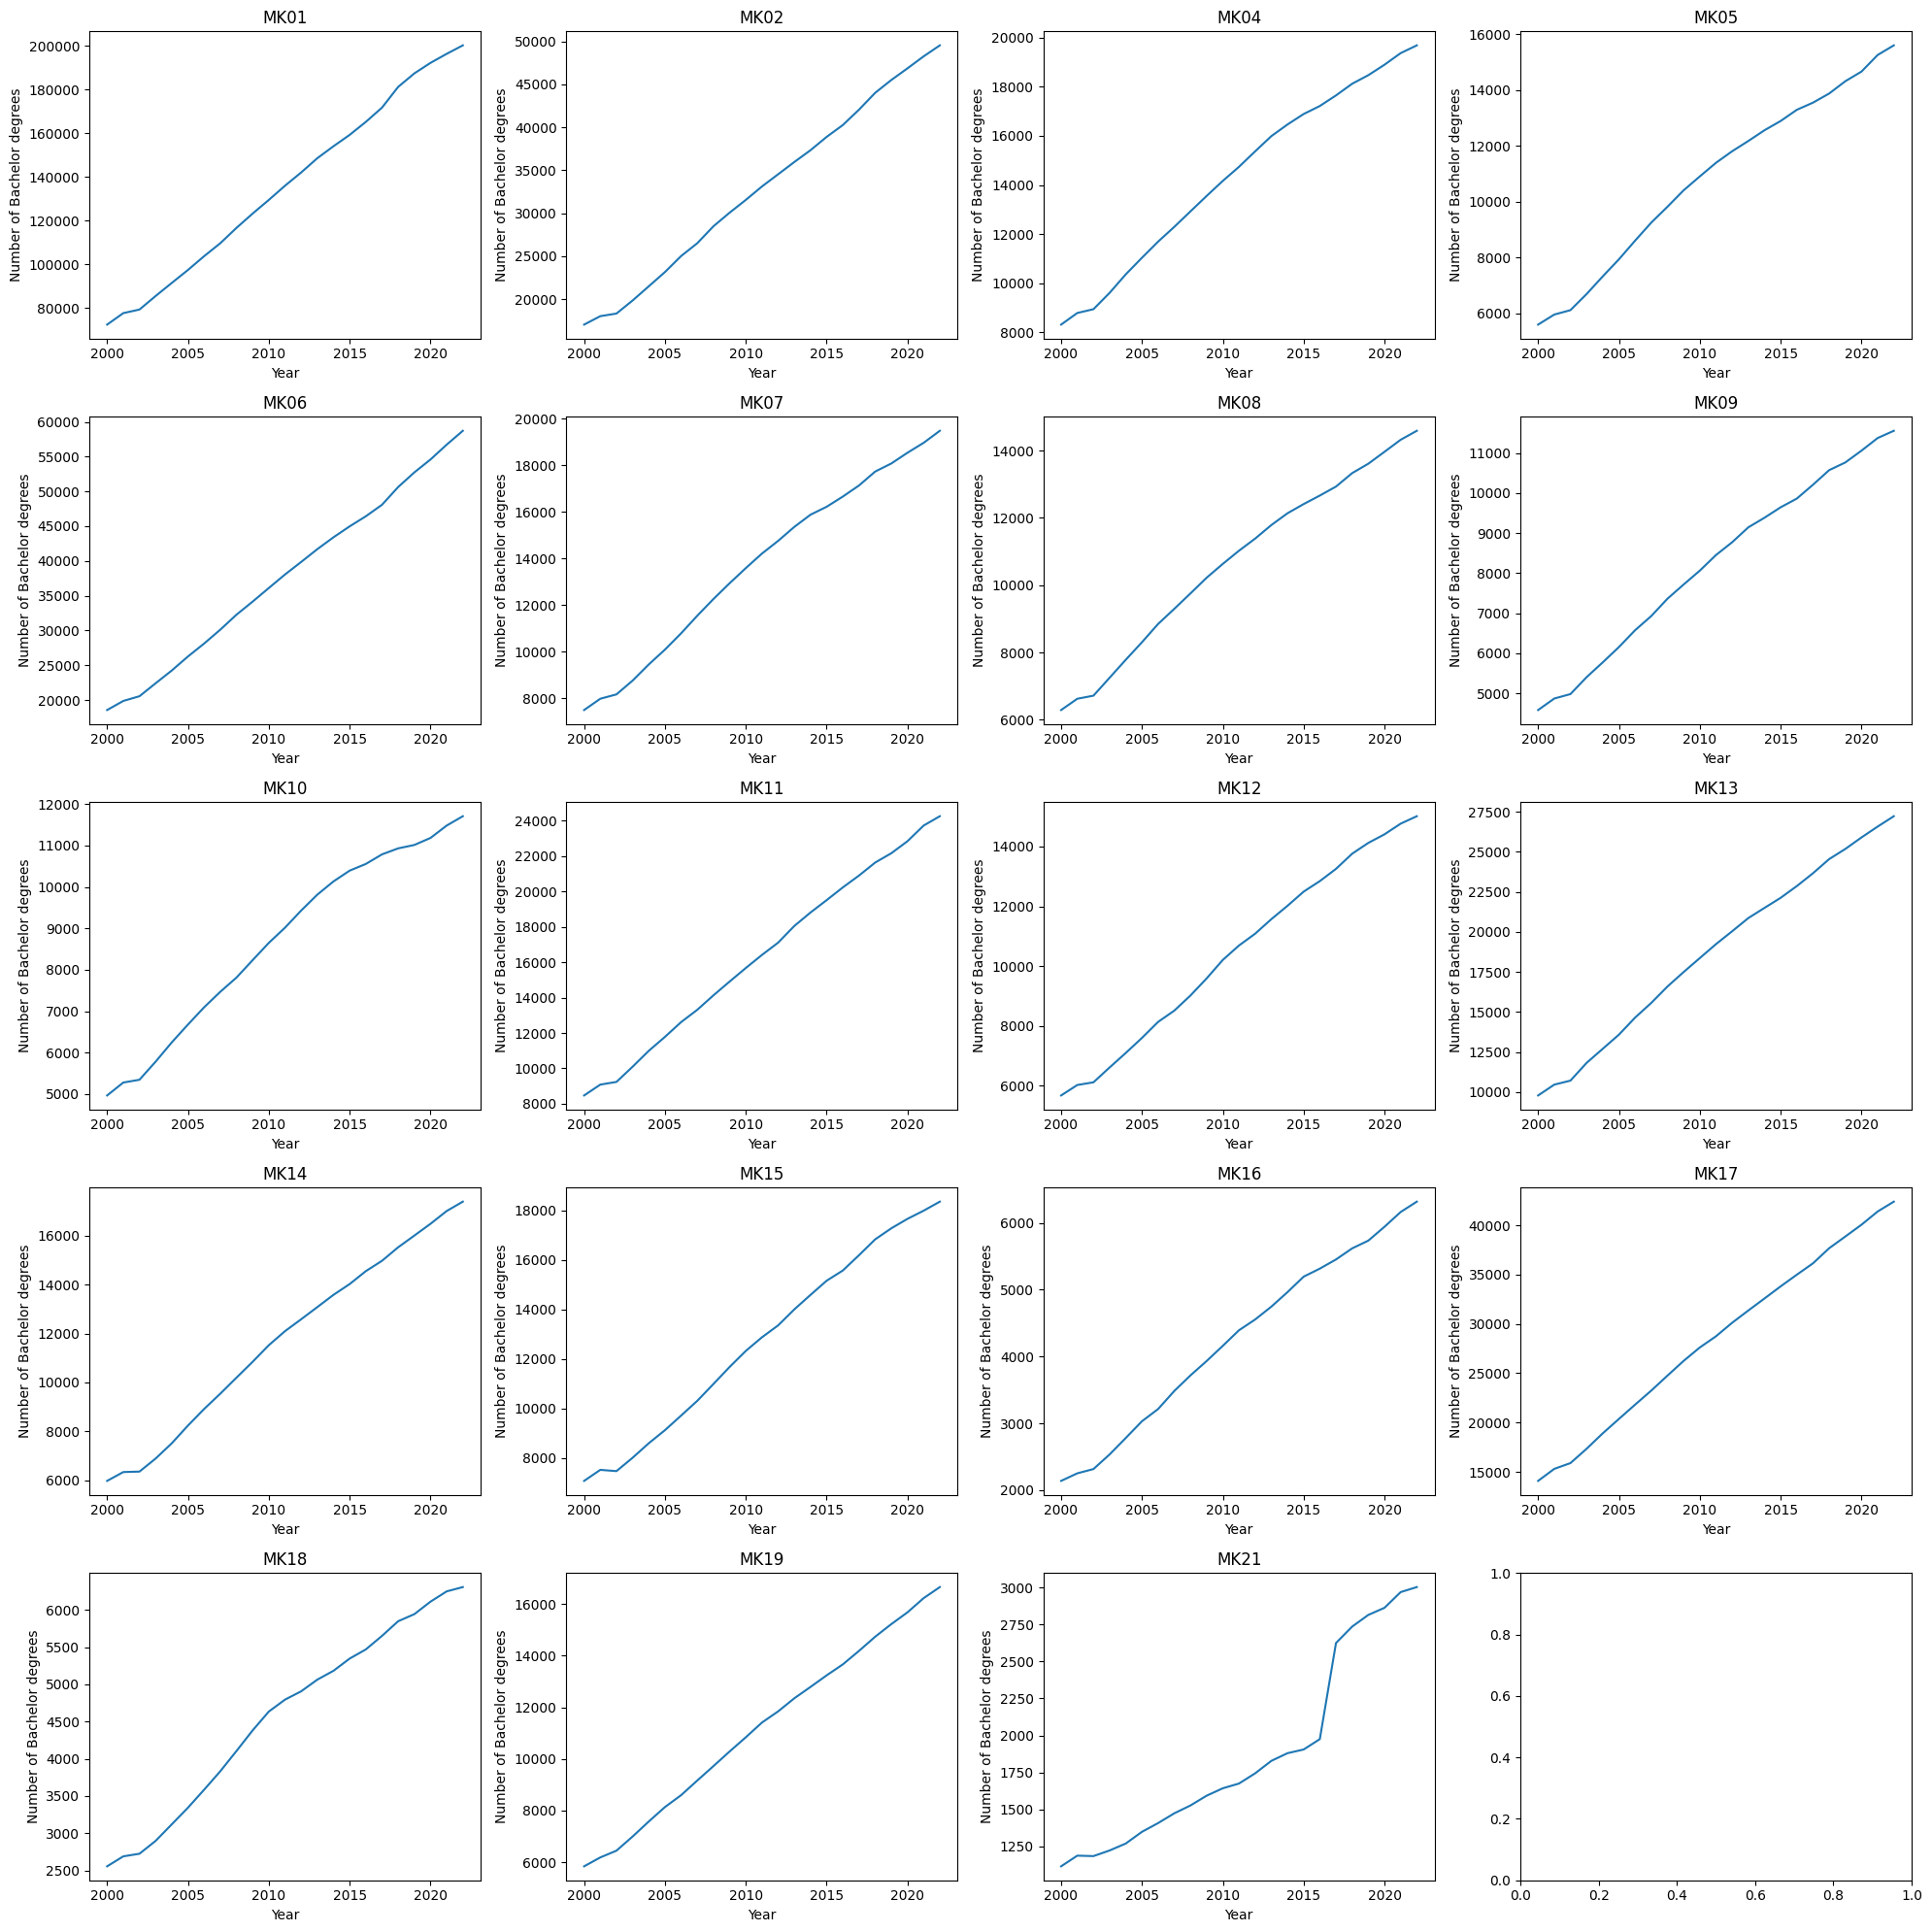

In [21]:
visualize_all_regions('Bachelor')

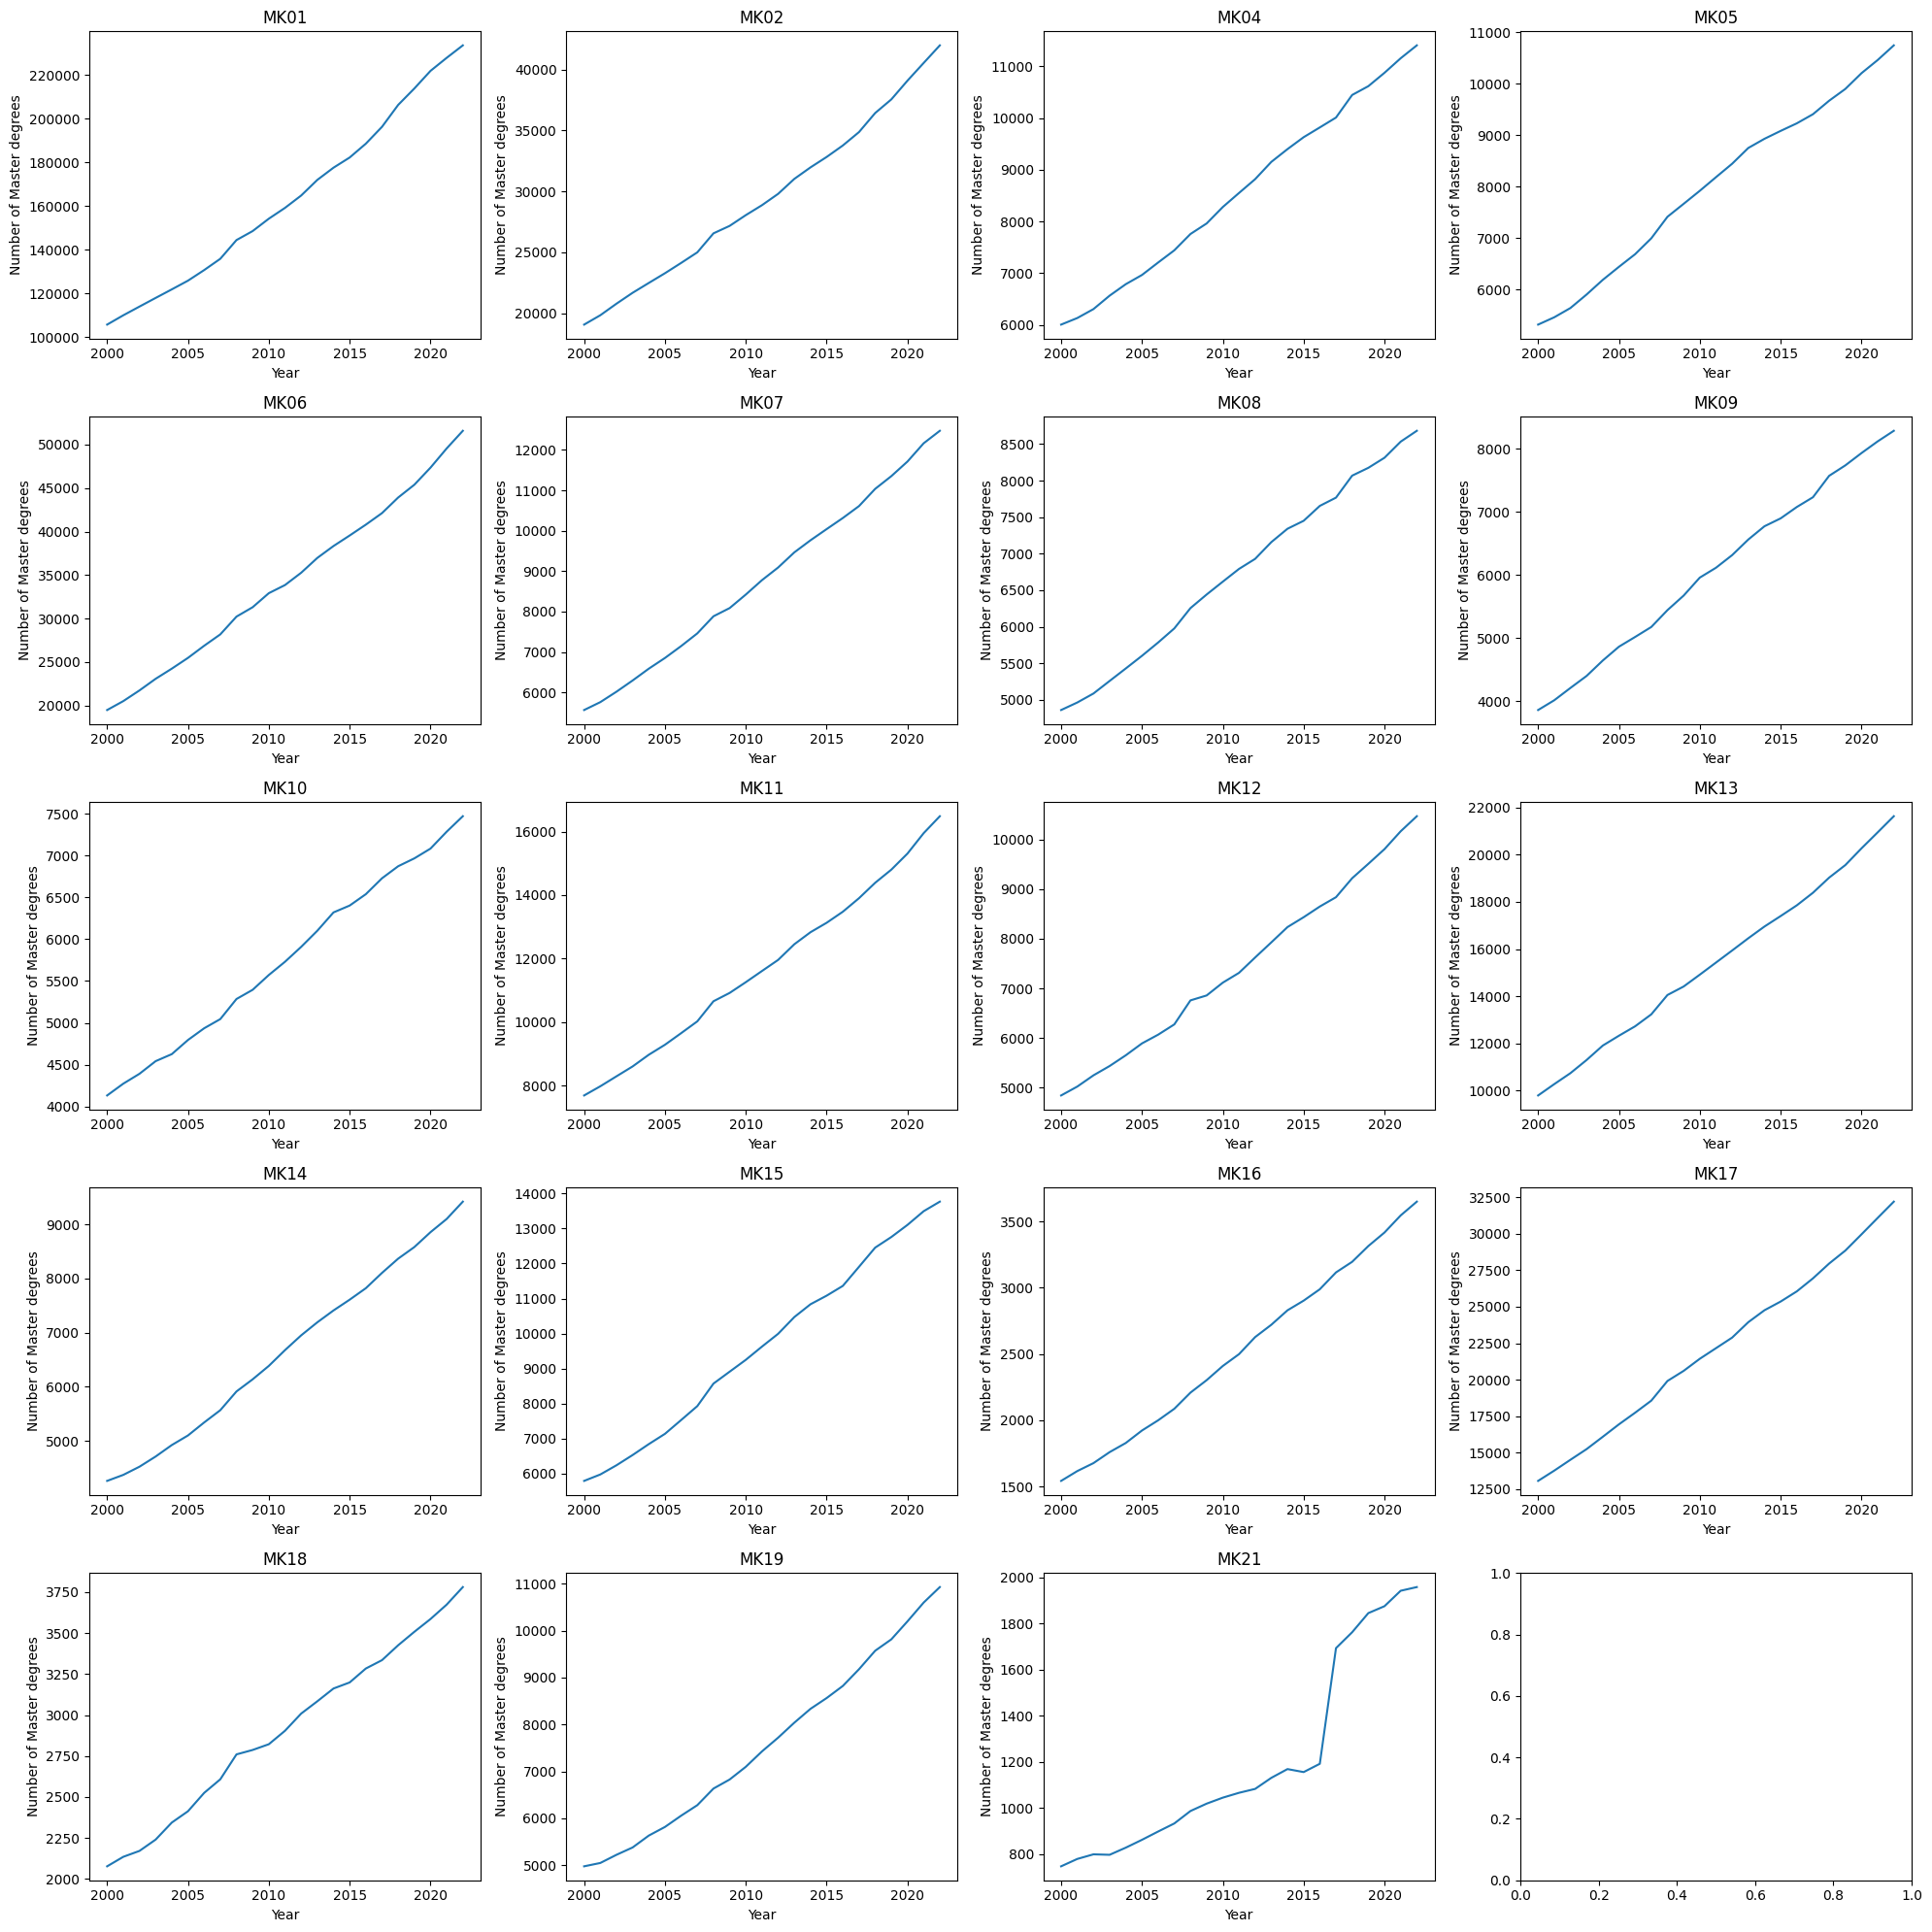

In [22]:
visualize_all_regions('Master')

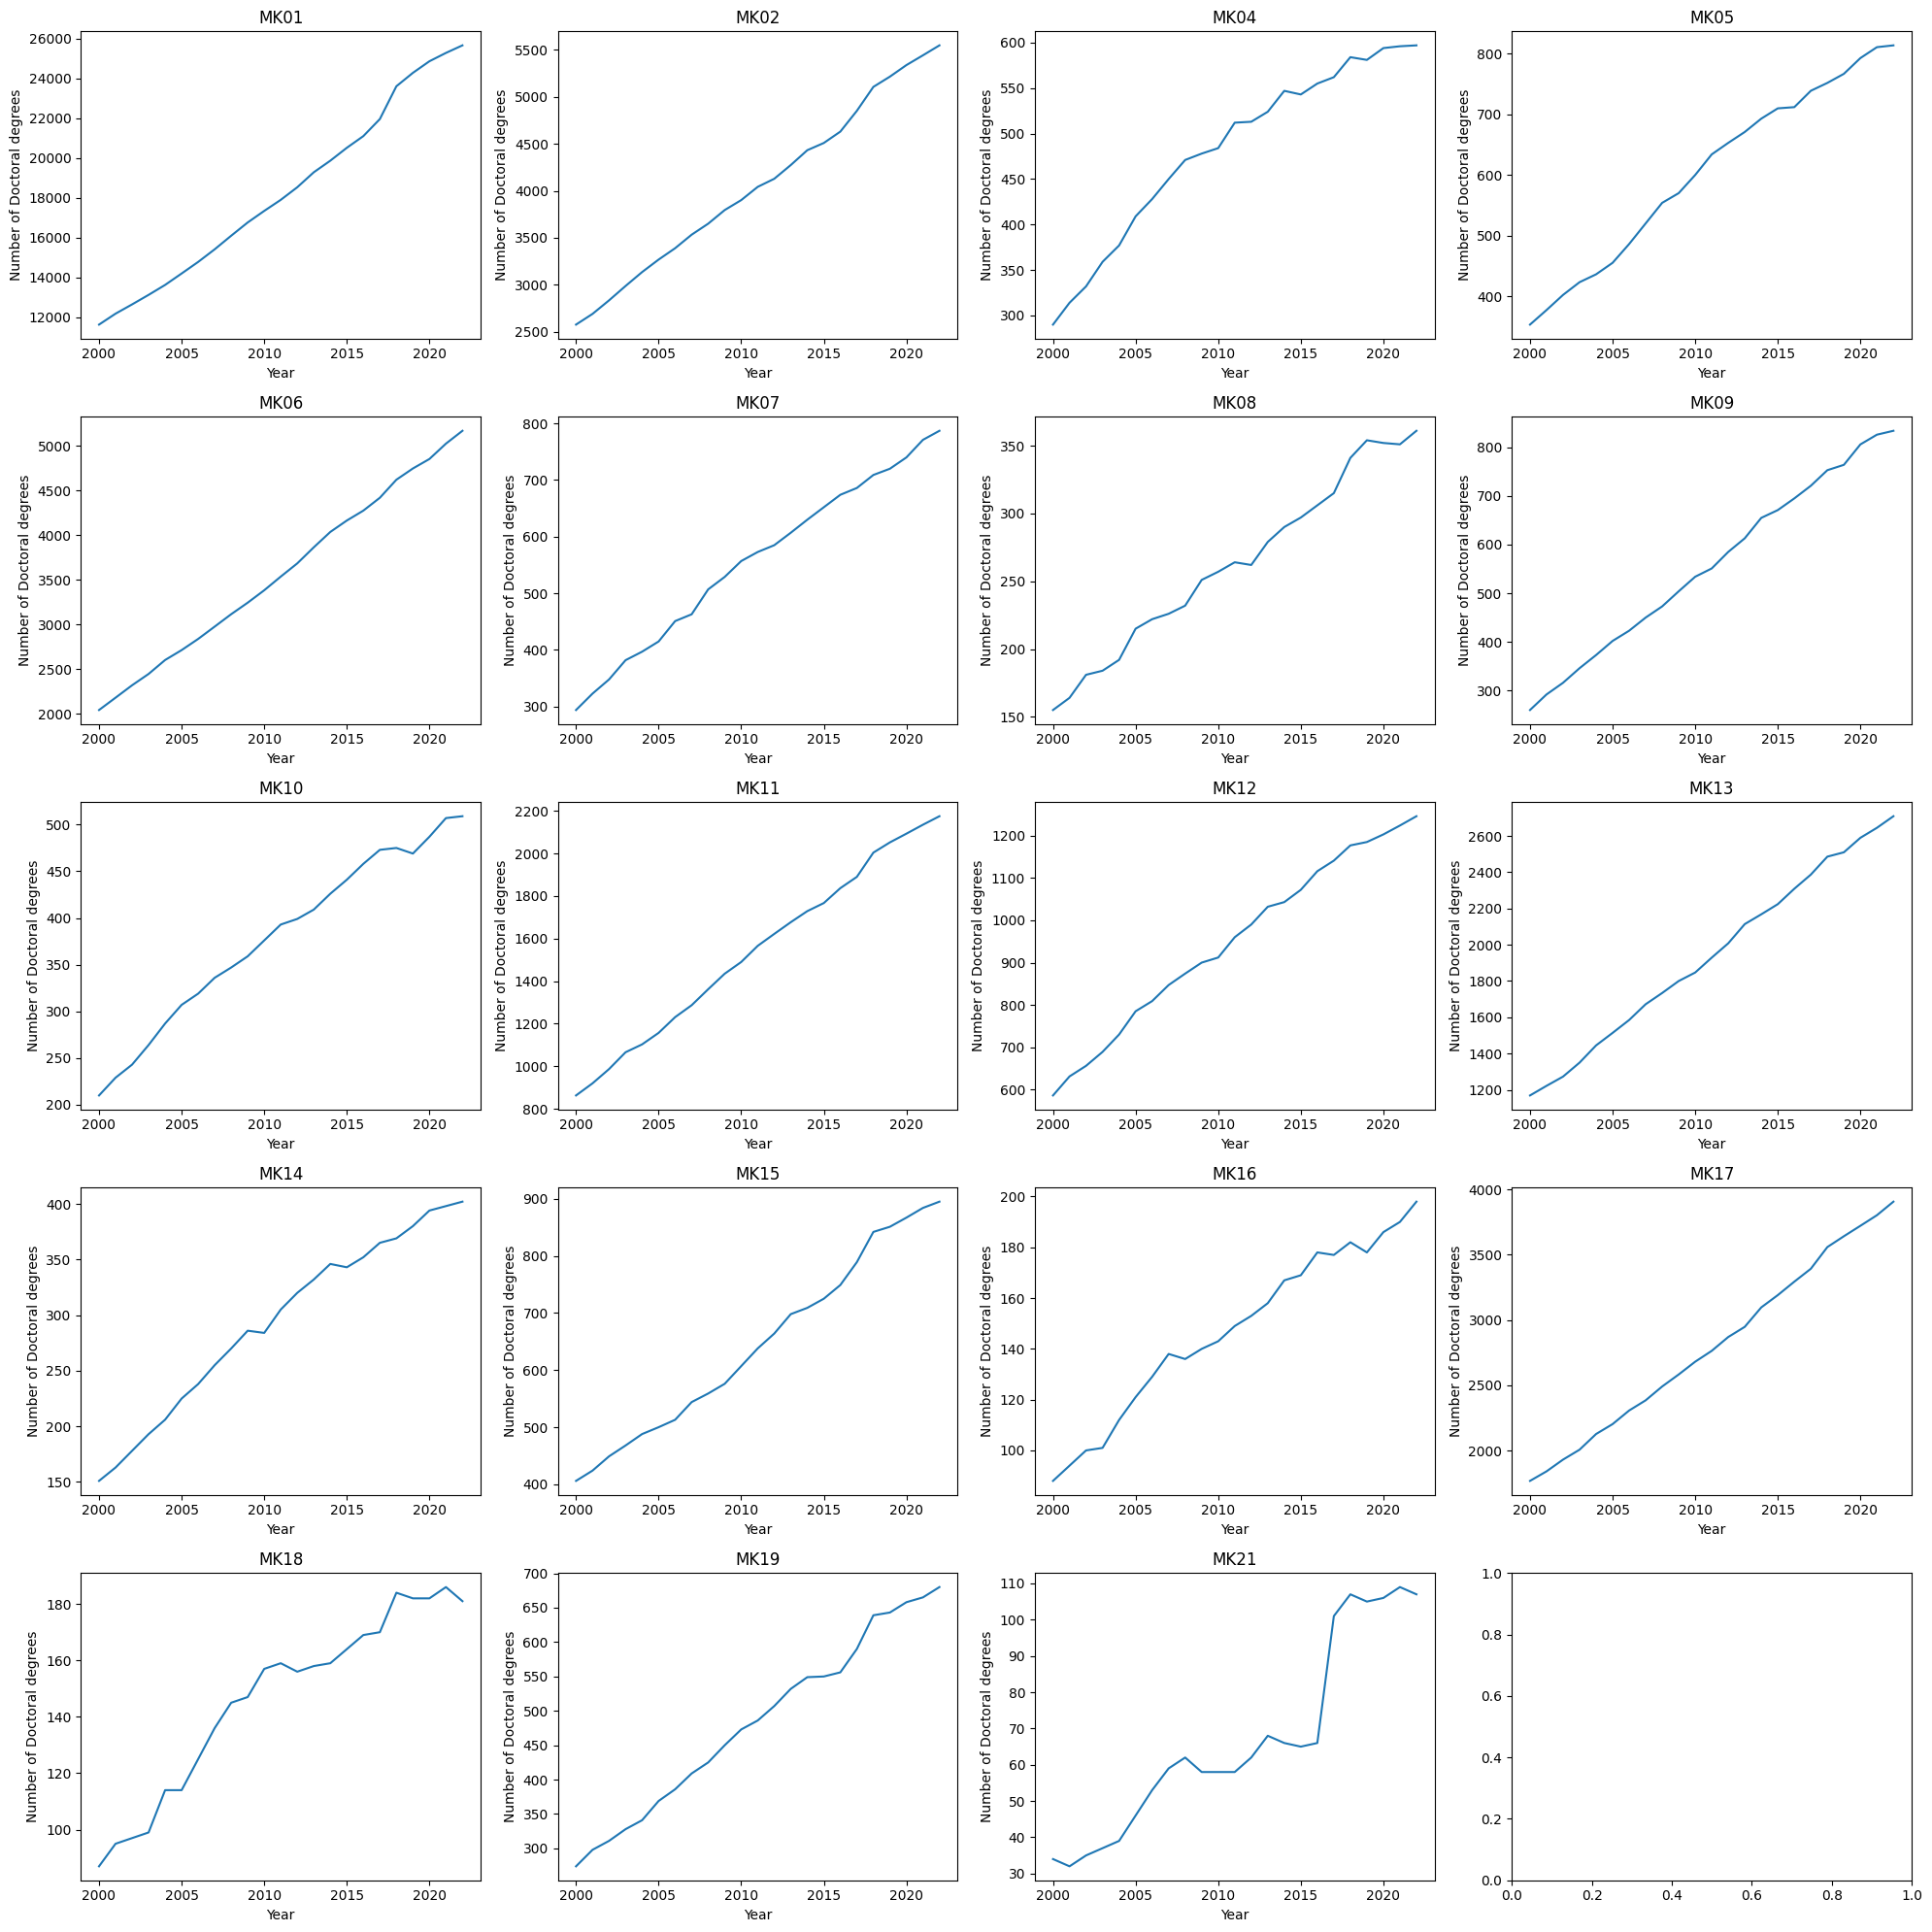

In [23]:
visualize_all_regions('Doctoral')

## ARIMA model

In [24]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_future_forecast_df(forecast_df, future_years, region):
    future_forecast_df = forecast_df[forecast_df['Year'].isin(future_years)].copy()
    future_forecast_df = future_forecast_df[['Year', 'Forecast']].copy()
    future_forecast_df.columns = ['Year', region]
    return future_forecast_df


def report_degree_region(region, degree, df, ax, dfs):
    '''Create and visualize forecast of the given degree in the given region with ARIMA'''

    # Get the region's data
    df_region = get_region_degree(region_code=region, degree=degree, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_size = 0.9
    split_index = int(len(df_region) * train_size)

    train_data = df_region[:split_index]
    test_data = df_region[split_index:]

    # Find the best ARIMA model automatically
    model = auto_arima(train_data[degree],
                       start_p=0,
                       start_q=0,
                       max_p=5,
                       max_q=5,
                       seasonal=False,
                       stationary=False)

    model.fit(train_data[degree])

    # Forecast for the training and test data
    train_forecast = model.predict_in_sample()
    test_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data = train_data[1:].copy()
    train_forecast = train_forecast[1:].copy()
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data[degree], train_forecast)
    test_mae = mean_absolute_error(test_data[degree], test_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
    forecast, conf_int = model.predict(n_periods=len(forecast_df), return_conf_int=True)
    forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data[degree], label='Train Data', marker='o', markersize=6, color='blue')
    ax.plot(forecast_df['Year'], forecast_df[degree], label='Test Data', marker='o', markersize=6, color='green')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Plot the confidence intervals for the forecasts
    cf = pd.DataFrame(conf_int)
    cf.index = forecast_df['Year']
    ax.fill_between(cf.index, cf[0], cf[1], color='grey', alpha=.3)

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast GDP per capita (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func, degree):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    dfs = []
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, degree, DATA, axes[i], dfs)
    plt.tight_layout()
    plt.show()

    return dfs


def future_forecast_all_regions(dfs):
    '''Create a DataFrame with the future forecasts of all regions'''
    df = pd.DataFrame({'Year': dfs[0]['Year']})
    for region in dfs:
        df = pd.merge(df, region, on='Year', how='inner')
    return df

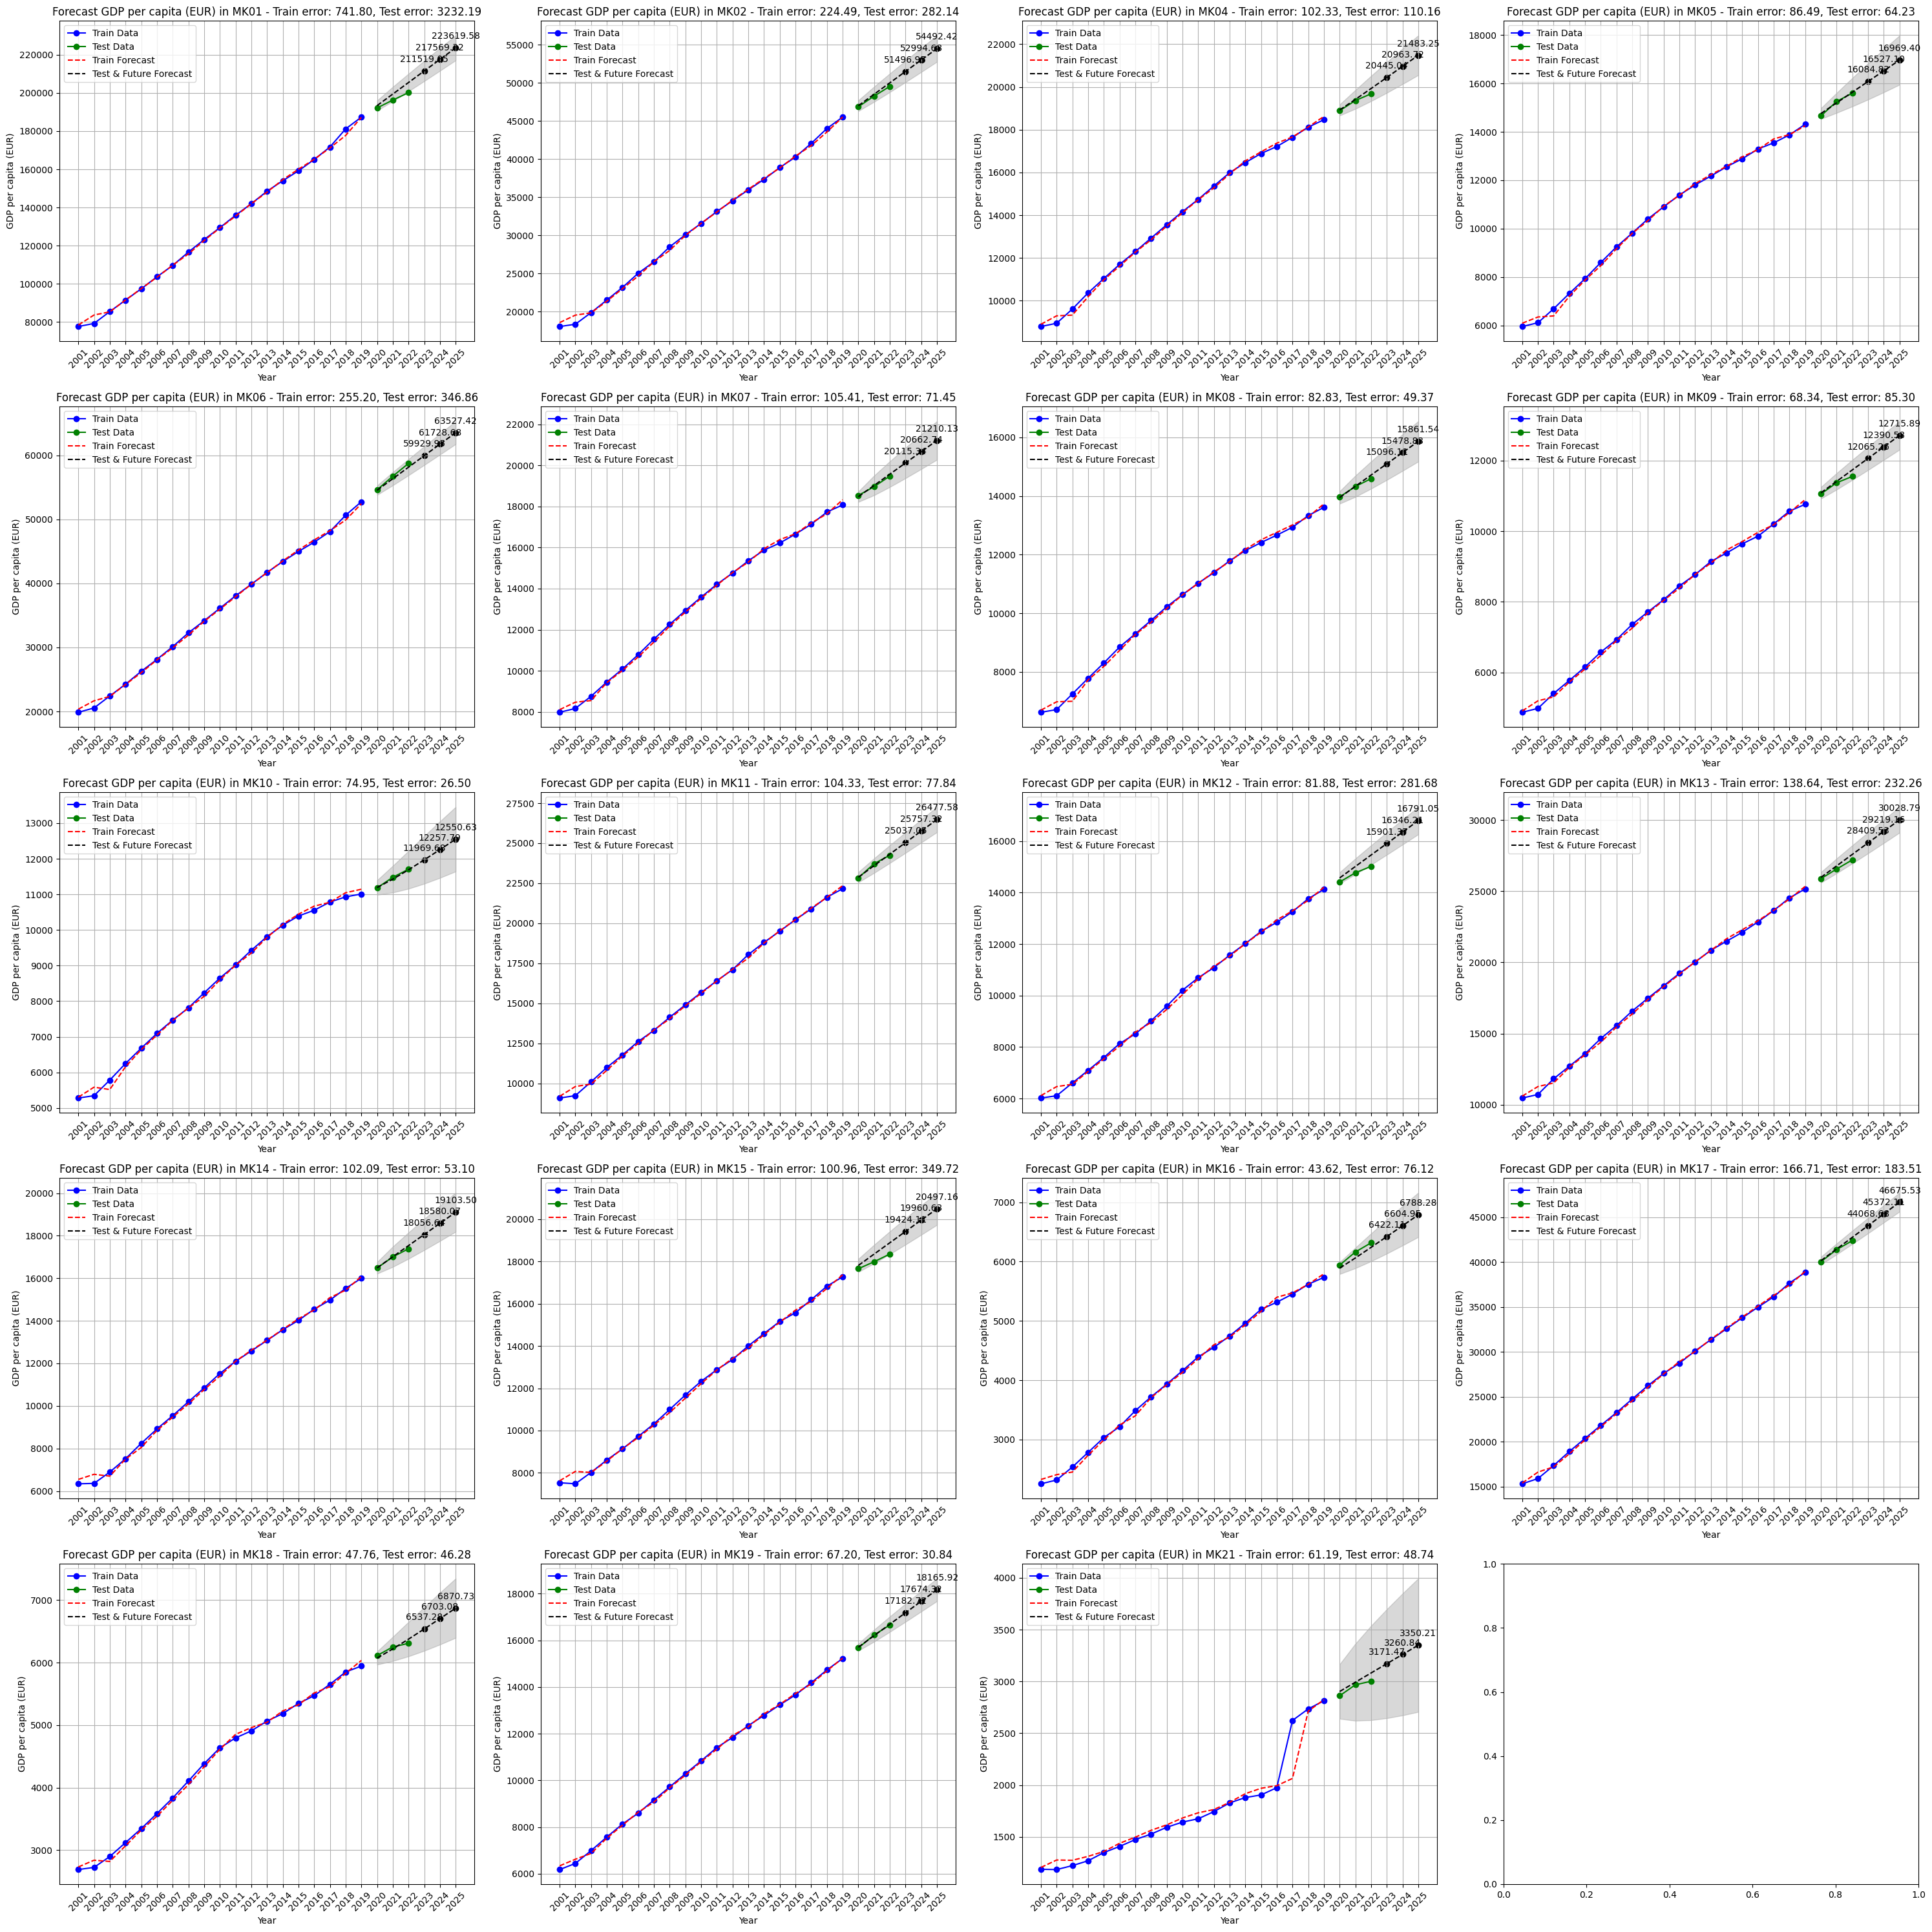

Year           MK01          MK02          MK04          MK05  \
0  2023  211519.052632  51496.947368  20445.044412  16084.823655   
1  2024  217569.315789  52994.684211  20963.721939  16527.096507   
2  2025  223619.578947  54492.421053  21483.252146  16969.403446   

           MK06          MK07          MK08          MK09          MK10  \
0  59929.947368  20115.339802  15096.106758  12065.263158  11969.683369   
1  61728.684211  20662.735685  15478.825831  12390.578947  12257.792954   
2  63527.421053  21210.131568  15861.544904  12715.894737  12550.634436   

           MK11          MK12          MK13          MK14          MK15  \
0  25037.052632  15901.368421  28409.526316  18056.637239  19424.105263   
1  25757.315789  16346.210526  29219.157895  18580.070736  19960.631579   
2  26477.578947  16791.052632  30028.789474  19103.504233  20497.157895   

          MK16          MK17         MK18          MK19         MK21  
0  6422.111958  44068.684211  6537.284436  17182.717291  3171.473684  
1  6604.953969  45372.105263  6703.084805  17674.316839  3260.842105  
2  6788.283436  46675.526316  6870.734564  18165.916387  3350.210526

In [25]:
# Forecast + visualize all regions for Bachelor's degrees
bachelor_all = forecast_and_visualize_all_regions(report_degree_region, 'Bachelor')

bachelor_all = future_forecast_all_regions(bachelor_all)
bachelor_all

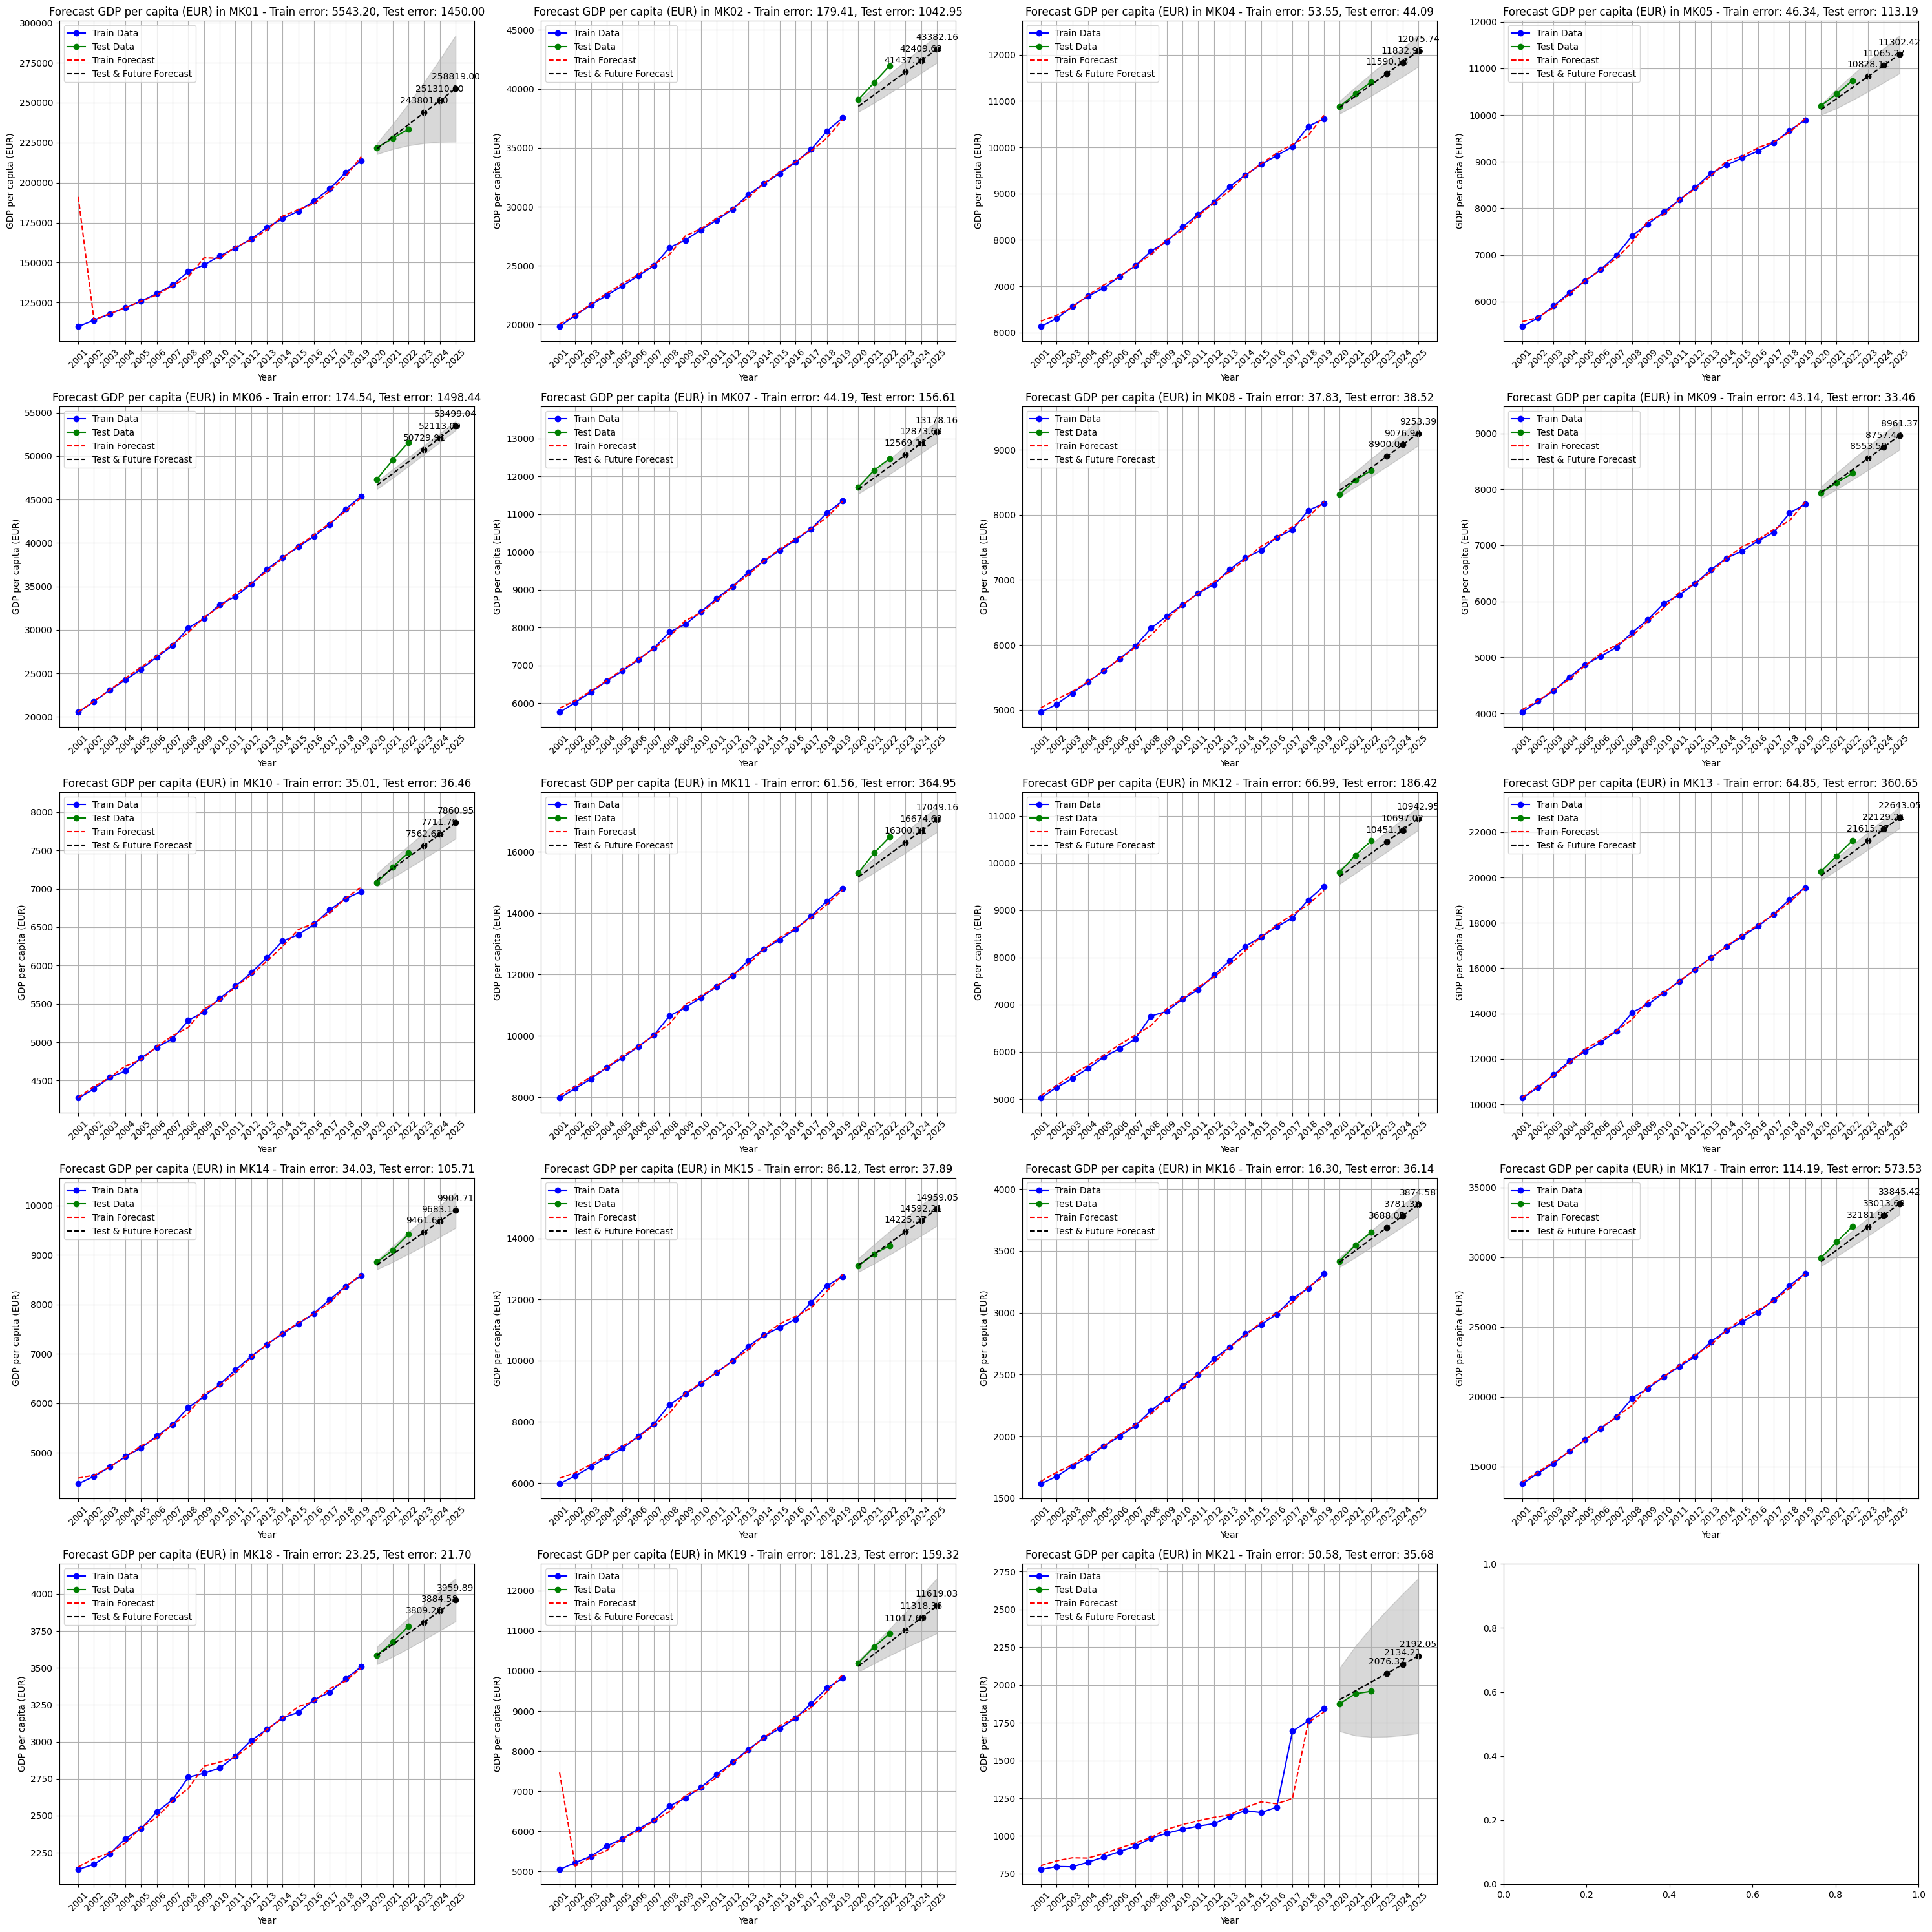

Year      MK01          MK02          MK04          MK05          MK06  \
0  2023  243801.0  41437.105263  11590.157895  10828.114729  50729.911603   
1  2024  251310.0  42409.631579  11832.947368  11065.266283  52113.092179   
2  2025  258819.0  43382.157895  12075.736842  11302.417837  53499.043332   

           MK07         MK08         MK09         MK10          MK11  \
0  12569.105263  8900.040284  8553.578947  7562.631579  16300.105263   
1  12873.631579  9076.968289  8757.473684  7711.789474  16674.631579   
2  13178.157895  9253.387197  8961.368421  7860.947368  17049.157895   

           MK12          MK13         MK14          MK15         MK16  \
0  10451.097857  21615.368421  9461.629735  14225.368421  3688.052632   
1  10697.024329  22129.210526  9683.130093  14592.210526  3781.315789   
2  10942.950802  22643.052632  9904.705404  14959.052632  3874.578947   

           MK17         MK18          MK19         MK21  
0  32181.947368  3809.263158  11017.686253  2076.368421  
1  33013.684211  3884.578947  11318.357817  2134.210526  
2  33845.421053  3959.894737  11619.029380  2192.052632

In [26]:
# Forecast + visualize all regions for Master's degrees
master_all = forecast_and_visualize_all_regions(report_degree_region, 'Master')

master_all = future_forecast_all_regions(master_all)
master_all

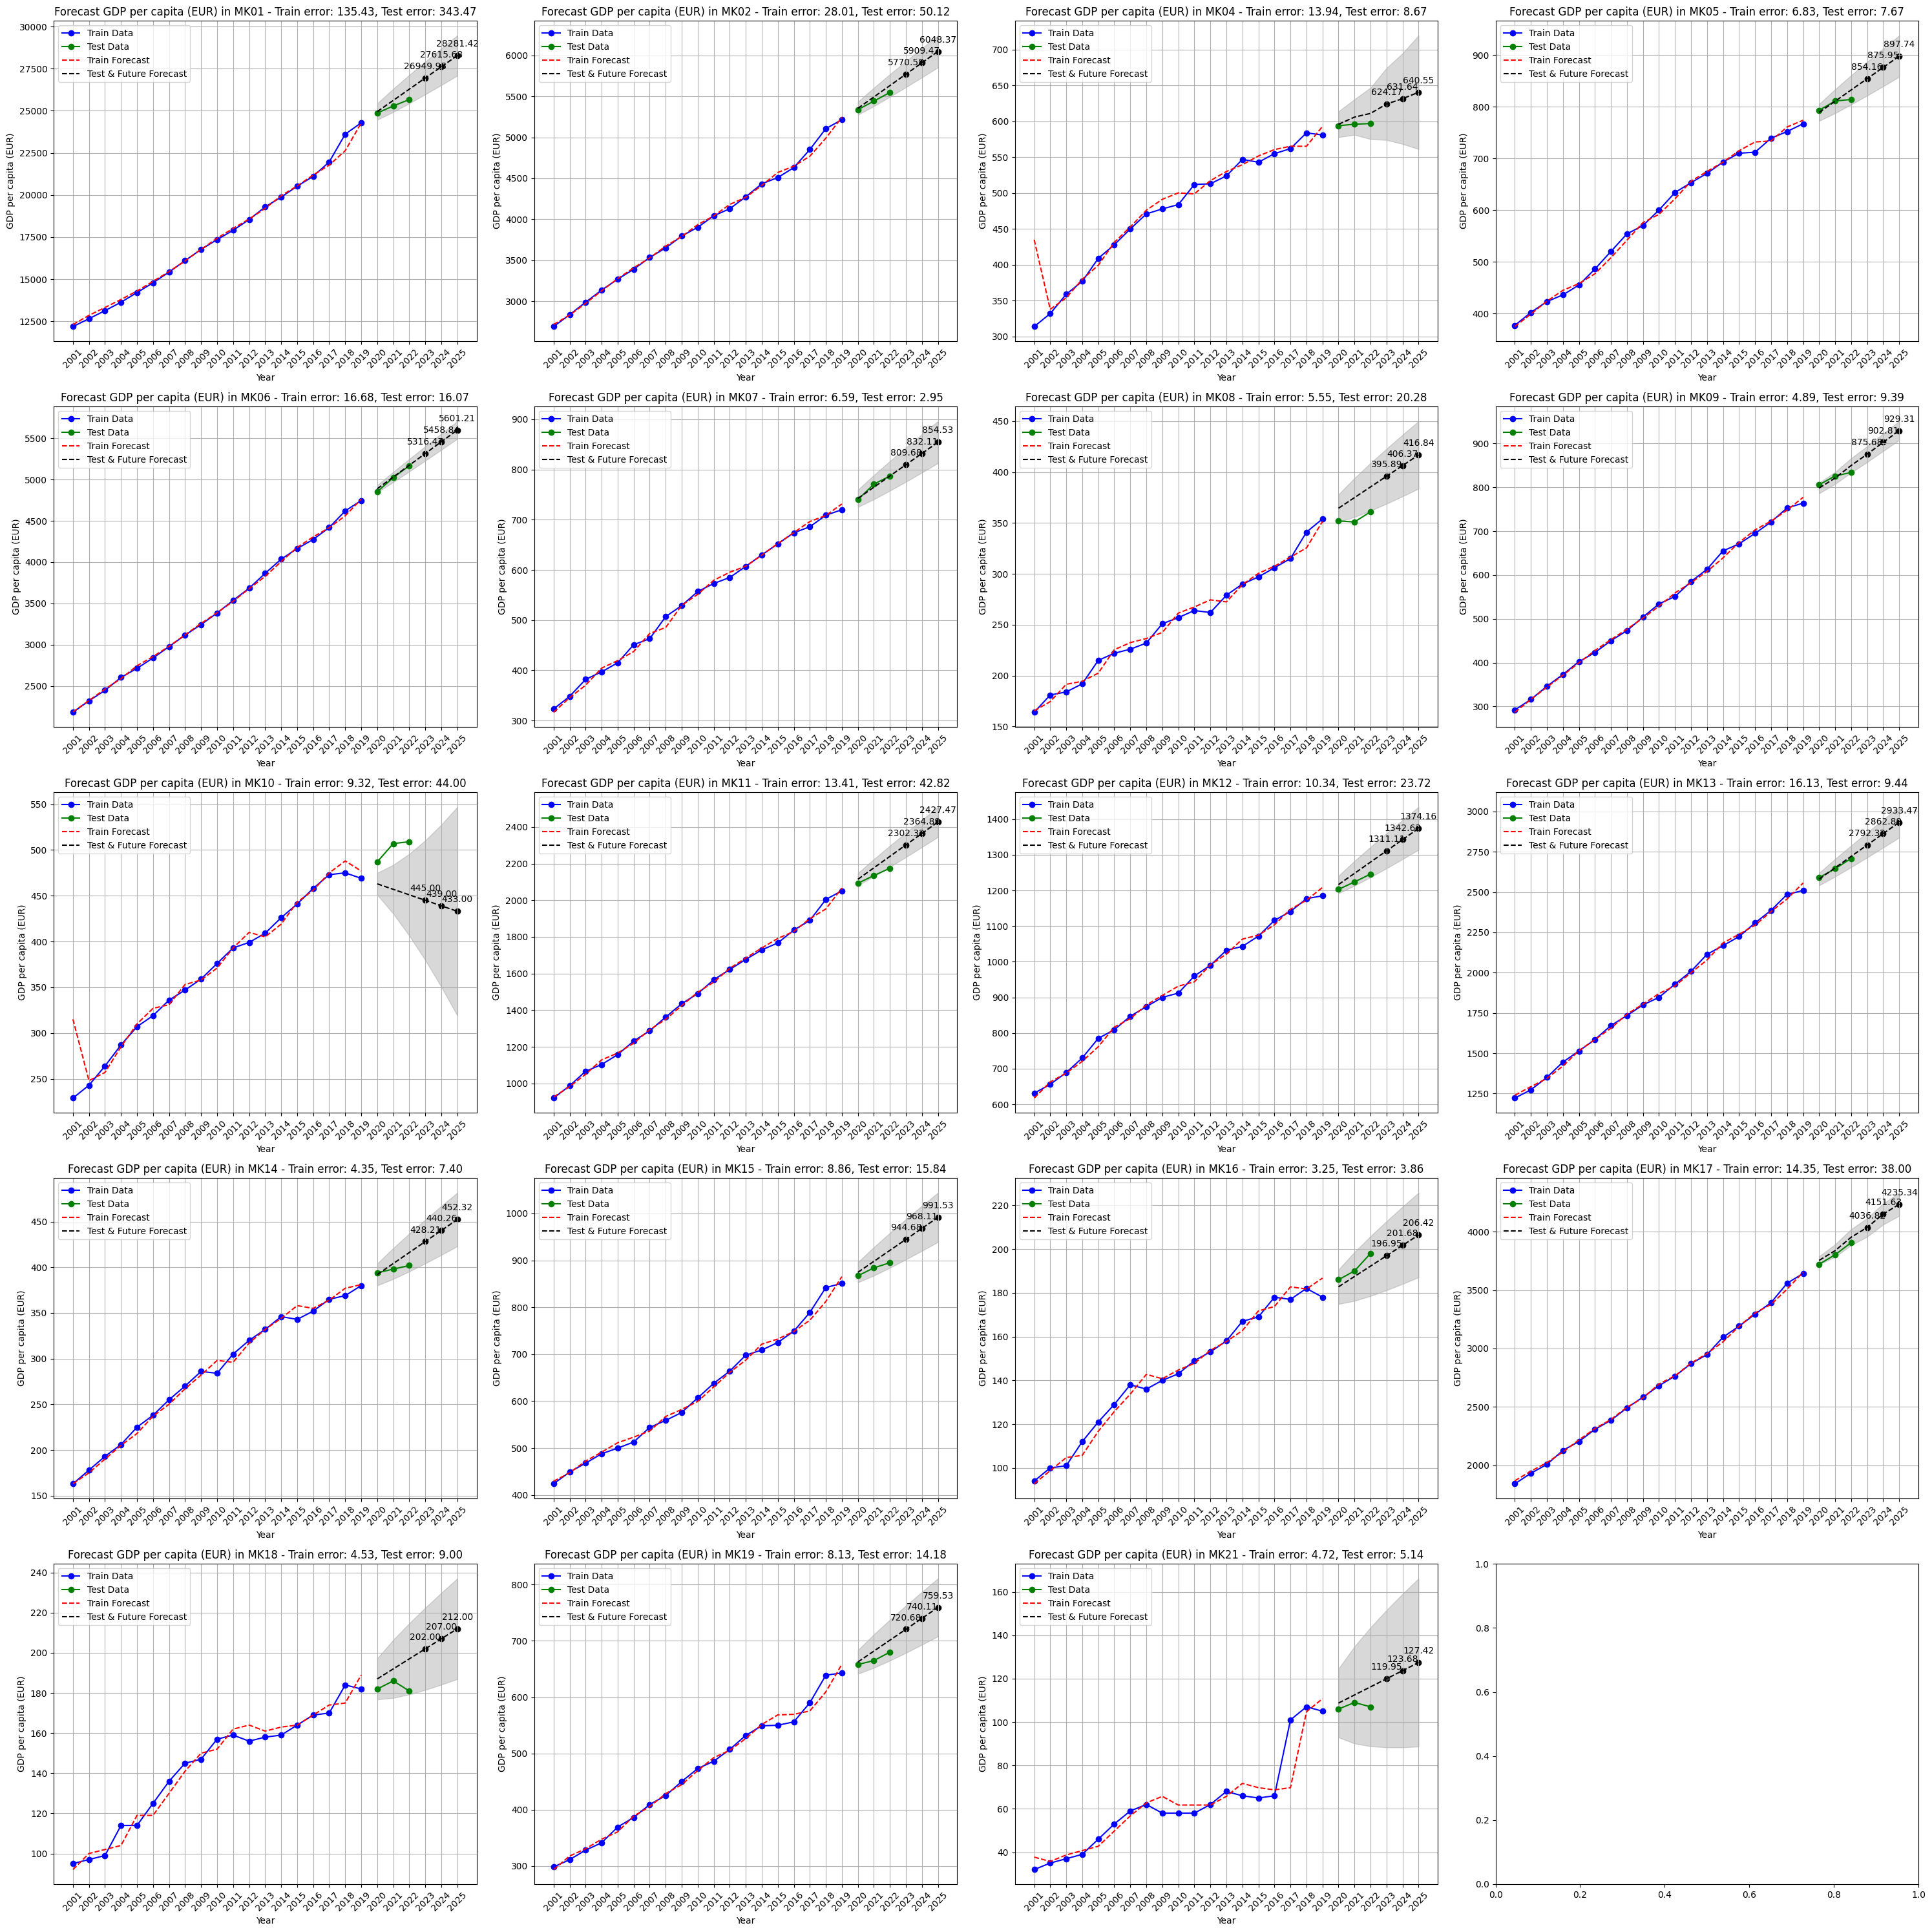

Year          MK01         MK02        MK04        MK05         MK06  \
0  2023  26949.947368  5770.578947  624.167804  854.157895  5316.473684   
1  2024  27615.684211  5909.473684  631.643151  875.947368  5458.842105   
2  2025  28281.421053  6048.368421  640.546717  897.736842  5601.210526   

         MK07        MK08        MK09   MK10         MK11         MK12  \
0  809.684211  395.894737  875.675386  445.0  2302.315789  1311.105263   
1  832.105263  406.368421  902.809289  439.0  2364.894737  1342.631579   
2  854.526316  416.842105  929.306754  433.0  2427.473684  1374.157895   

          MK13        MK14        MK15        MK16         MK17   MK18  \
0  2792.315789  428.210526  944.684211  196.947368  4036.819609  202.0   
1  2862.894737  440.263158  968.105263  201.684211  4151.633012  207.0   
2  2933.473684  452.315789  991.526316  206.421053  4235.343863  212.0   

         MK19        MK21  
0  720.684211  119.947368  
1  740.105263  123.684211  
2  759.526316  127.421053

In [27]:
# Forecast + visualize all regions for Doctoral degrees
doctoral_all = forecast_and_visualize_all_regions(report_degree_region, 'Doctoral')

doctoral_all = future_forecast_all_regions(doctoral_all)
doctoral_all

In [29]:
# save the dataframes to csv files
bachelor_all.to_csv('../data/forecast_values/bachelor_forecast.csv', index=False)
master_all.to_csv('../data/forecast_values/master_forecast.csv', index=False)
doctoral_all.to_csv('../data/forecast_values/doctoral_forecast.csv', index=False)